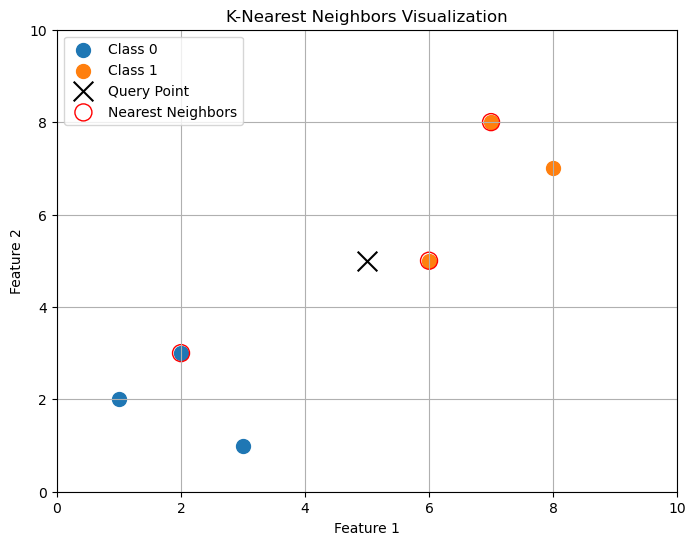

预测的标签: 1


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个简单的二维数据集
data = np.array([[1, 2], [2, 3], [3, 1], [6, 5], [7, 8], [8, 7]])
labels = np.array([0, 0, 0, 1, 1, 1])  # 对应的标签

# 定义待分类的点
query_point = np.array([5, 5])

# 计算每个点与待分类点的欧几里得距离
distances = np.linalg.norm(data - query_point, axis=1)

# 使用 np.argsort() 找到距离的排序索引
sorted_indices = np.argsort(distances)

# 选择 K 个最近邻
K = 3
nearest_indices = sorted_indices[:K]

# 获取最近邻的标签
nearest_labels = labels[nearest_indices]

# 进行投票（分类）
unique, counts = np.unique(nearest_labels, return_counts=True)
predicted_label = unique[np.argmax(counts)]

# 可视化
plt.figure(figsize=(8, 6))

# 绘制数据点
for label in np.unique(labels):
    plt.scatter(data[labels == label][:, 0], data[labels == label][:, 1], label=f'Class {label}', s=100)

# 绘制待分类的点
plt.scatter(query_point[0], query_point[1], color='black', marker='x', s=200, label='Query Point')

# 绘制最近邻的点
plt.scatter(data[nearest_indices][:, 0], data[nearest_indices][:, 1], 
            edgecolor='red', facecolor='none', s=150, label='Nearest Neighbors')

# 添加图例和标题
plt.title('K-Nearest Neighbors Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.xlim(0, 10)
plt.ylim(0, 10)

# 显示图形
plt.show()

# 输出预测的标签
print("预测的标签:", predicted_label)


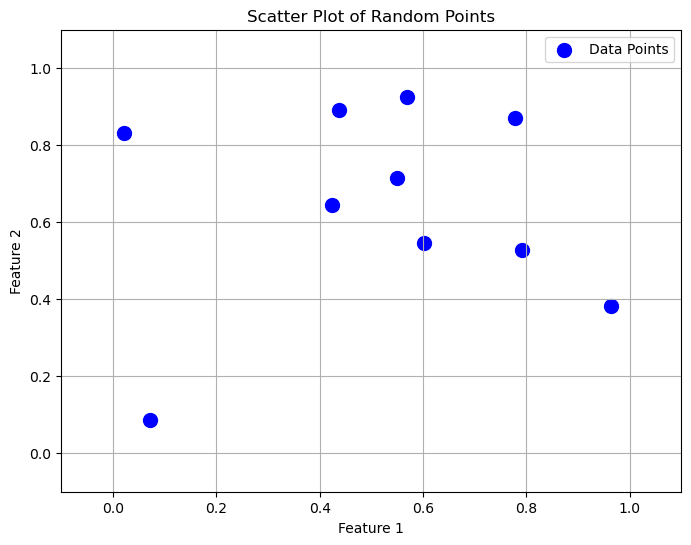

平方距离矩阵:
 [[0.         0.03191478 0.02046653 0.04355307 0.28215654 0.09371163
  0.04464105 0.62273073 0.2932027  0.07656842]
 [0.03191478 0.         0.04228309 0.14761571 0.15631178 0.03596213
  0.14614813 0.49227256 0.42215104 0.13647168]
 [0.02046653 0.04228309 0.         0.06065054 0.36048996 0.14916451
  0.09908191 0.43655809 0.19762743 0.17590053]
 [0.04355307 0.14761571 0.06065054 0.         0.53515638 0.2570941
  0.01816316 0.78181123 0.17769582 0.11646115]
 [0.28215654 0.15631178 0.36048996 0.53515638 0.         0.05071927
  0.45044593 0.88458336 1.09184844 0.27116346]
 [0.09371163 0.03596213 0.14916451 0.2570941  0.05071927 0.
  0.20740521 0.71454947 0.68747133 0.11654506]
 [0.04464105 0.14614813 0.09908191 0.01816316 0.45044593 0.20740521
  0.         0.95004493 0.30875819 0.04723677]
 [0.62273073 0.49227256 0.43655809 0.78181123 0.88458336 0.71454947
  0.95004493 0.         0.55833859 1.11292523]
 [0.2932027  0.42215104 0.19762743 0.17769582 1.09184844 0.68747133
  0.30875819

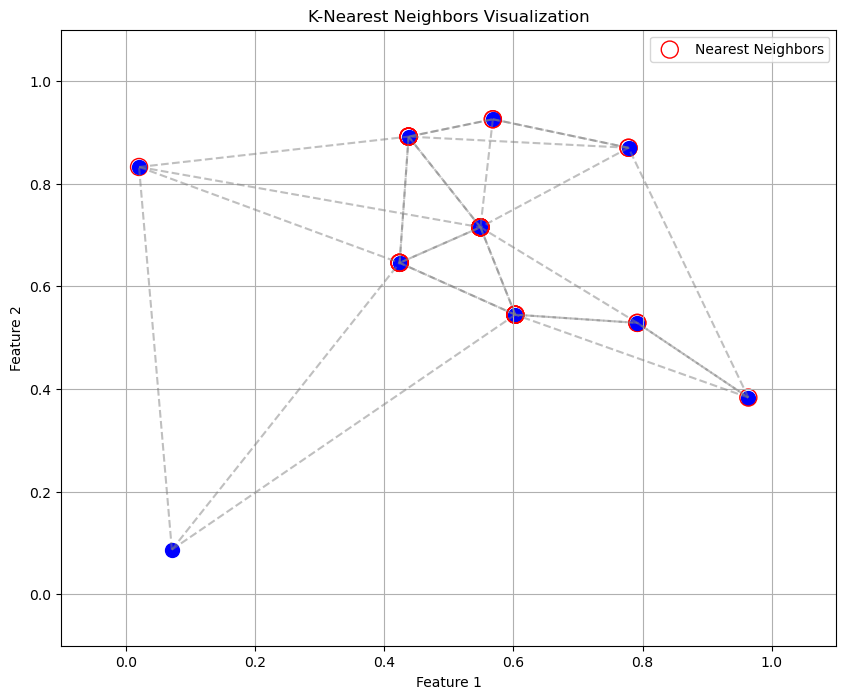

In [5]:
# 创建随机点并绘制散点图：

# 使用 np.random.rand() 生成 10 个随机点，并将它们存储在 data 数组中。
# 使用 plt.scatter() 绘制这些点的散点图。
# 计算平方距离矩阵：

# 使用广播计算平方距离矩阵。公式为：
# [
# D_{ij}^2 = ||x_i||^2 + ||x_j||^2 - 2 \cdot (x_i \cdot x_j)
# ]
# 计算得到的 dist_squared 矩阵表示每对点之间的平方距离。
# 使用 np.argsort() 进行排序：

# 使用 np.argsort() 对平方距离矩阵进行排序，得到每个点的最近邻索引。
# 使用 np.argpartition() 实现 K 个最近邻并可视化：

# 使用 np.argpartition() 找到每个点的 K 个最近邻，并排除自身。
# 绘制每个点及其最近邻，并用虚线连接它们。


import numpy as np
import matplotlib.pyplot as plt

# 1. 创建随机点并绘制散点图
np.random.seed(0)  # 为了结果可重复
num_points = 10
data = np.random.rand(num_points, 2)  # 生成 10 个随机点 (10x2)

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', s=100, label='Data Points')
plt.title('Scatter Plot of Random Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()

# 2. 计算两两数据点之间的平方距离
# 利用广播计算平方距离矩阵
dist_squared = np.sum(data**2, axis=1).reshape(-1, 1) + np.sum(data**2, axis=1) - 2 * np.dot(data, data.T)

# 输出平方距离矩阵
print("平方距离矩阵:\n", dist_squared)

# 3. 使用 np.argsort() 进行排序
sorted_indices = np.argsort(dist_squared, axis=1)

# 输出排序后的索引
print("每个点的最近邻索引（排序后）:\n", sorted_indices)

# 4. 使用 np.argpartition() 实现 K 个最近邻并可视化
K = 3  # 选择 K 值
plt.figure(figsize=(10, 8))

for i in range(num_points):
    # 使用 np.argpartition 找到 K 个最近邻
    nearest_indices = np.argpartition(dist_squared[i], K + 1)[:K + 1]  # +1 是因为包括自己
    nearest_indices = nearest_indices[nearest_indices != i]  # 排除自己

    # 绘制当前点
    plt.scatter(data[i, 0], data[i, 1], color='blue', s=100)

    # 绘制最近邻
    plt.scatter(data[nearest_indices, 0], data[nearest_indices, 1], edgecolor='red', facecolor='none', s=150, label='Nearest Neighbors' if i == 0 else "")

    # 连接线
    for j in nearest_indices:
        plt.plot([data[i, 0], data[j, 0]], [data[i, 1], data[j, 1]], color='gray', linestyle='--', alpha=0.5)

# 添加图例和标题
plt.title('K-Nearest Neighbors Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

# 显示图形
plt.show()
